In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.letter_extraction import *
from utils.word_split import slicing_window_transform

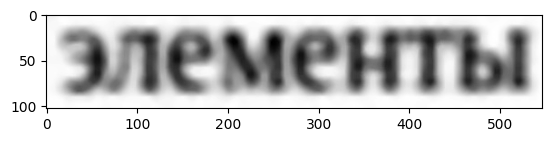

In [9]:
word = cv2.imread('../words/word3.jpg', 0)
plt.imshow(word, cmap='gray')

Found 0 contours


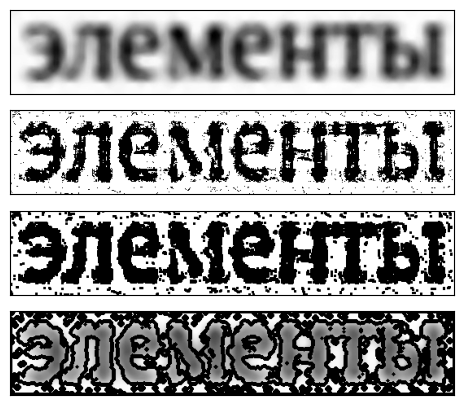

In [44]:
def letters_extract(img, out_size=28, scale_factor=1, erode_core=np.ones((3, 3), np.uint8), num_erosions=1, split_trashold=200, verbose=False):
    letters = []

    img = cv2.resize(img, (img.shape[1] * scale_factor, img.shape[0] * scale_factor), interpolation=cv2.INTER_LINEAR)

    orig = img.copy()
    thresh = cv2.adaptiveThreshold(img, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY, 7, 1)
    
    # thresh_val = 180
    # 
    # #получим картинку, обрезанную порогом
    # ret,thresh = cv2.threshold(img, thresh_val, 255, cv2.THRESH_BINARY)
    


    
    img_erode = cv2.erode(thresh, erode_core, iterations=num_erosions)
    # Get contours
    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    hir = hierarchy[0, :, 3]

    inner_conts = []

    for idx, contour in enumerate(contours):
        if hir[idx] == 0:
            (x, y, w, h) = cv2.boundingRect(contour)

            inner_conts.append(contour)

            if (w > img.shape[1] * scale_factor / split_trashold) or ((w-h>25)and(h>img.shape[0]//3*scale_factor)):
                letter_crop1 = img[y:y+h, x:x + w // 2]
                letter_crop2 = img[y:y+h, x + w // 2:x + w]

                # Resize letter canvas to square
                letters.append(form_sample(x, y, w // 2, h, letter_crop1, out_size))
                letters.append(form_sample(x + w // 2, y, w // 2, h, letter_crop2, out_size))
            else:

                letter_crop = img[y:y+h, x:x + w]

                # Resize letter canvas to square
                letters.append(form_sample(x, y, w, h, letter_crop, out_size))

    # Sort array in place by X-coordinate
    letters.sort(key=lambda x: x[0][0], reverse=False)
    if verbose:
        fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(20,5))
        ax[0].imshow(orig, cmap='gray')
        ax[1].imshow(thresh, cmap='gray')
        ax[2].imshow(img_erode, cmap='gray')
        ax[3].imshow(cv2.drawContours(img, contours, -1, (0,0,0), 3), cmap='gray')
        for axs in ax:
            axs.set_xticks([])
            axs.set_yticks([])
    print(f"Found {len(inner_conts)} contours")
    return letters
core = np.zeros((3,3))
core[1,:] = np.ones(3)
lets = letters_extract(word, verbose=True)

In [24]:
core = np.zeros((3,3))
core[1,:] = np.ones(3)
core

array([[0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.]])

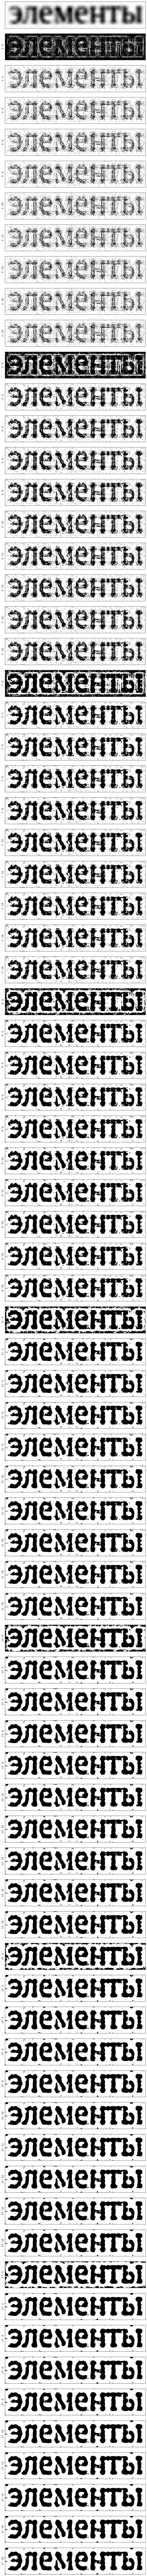

In [59]:
cores = list(range(3,18,2))
consts = list(range(0,20,2))
num_iters = len(cores)*len(consts) +1

fig, ax = plt.subplots(ncols=1, nrows=num_iters, figsize=(20,200))
ax[0].imshow(word, cmap='gray')
i = 0
ax[i].set_xticks([])
ax[i].set_yticks([])
for core in cores:
    for const in consts:
        i+=1
        thresh = cv2.adaptiveThreshold(word, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY, core, const/100)
        ax[i].imshow(thresh, cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])     
        ax[i].set_ylabel(f'{core} - {const}')     
